In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ghibtools as gh
import seaborn as sns
import glob
from pyedflib import highlevel
import datetime
from params import patients

In [3]:
participants = patients

In [4]:
def get_sleep_features(participants=participants):
    concat = []
    for participant in participants:
        df = pd.read_excel(f'../participant_characteristics/sleep_parameters_{participant}.xlsx', index_col = 0)
        concat.append(df)
    df_all = pd.concat(concat)
    return df_all

In [5]:
sleep_params = get_sleep_features()

In [6]:
sleep_params

,participant,method,time in bed,sleep onset latency,total sleep period,wake after sleep onset,total sleep time,sleep efficiency,rem latency,N2 raw time,N2 norm time,N3 raw time,N3 norm time,rem raw time,rem norm time,arousal index
0,P1,human,529.666667,49.0,480.666667,51.0,392.5,0.741032,77.0,208.0,0.529936,72.5,0.184713,99.0,0.252229,16.509554
1,P1,ia,529.666667,62.0,467.666667,166.5,264.5,0.499371,64.0,141.5,0.534972,34.0,0.128544,87.5,0.330813,24.499055
0,P2,human,566.666667,43.5,523.166667,40.5,482.5,0.851471,153.0,228.5,0.473575,100.5,0.208290,123.5,0.255959,18.404145
1,P2,ia,566.666667,36.0,530.666667,115.0,415.5,0.733235,160.5,259.5,0.624549,50.0,0.120337,101.5,0.244284,21.371841
0,P3,human,598.850000,16.5,582.350000,34.5,548.0,0.915087,170.5,293.0,0.534672,112.5,0.205292,131.5,0.239964,20.583942
1,P3,ia,598.850000,41.5,557.350000,187.5,370.0,0.617851,145.5,242.5,0.655405,30.0,0.081081,96.0,0.259459,30.486486
0,P4,human,551.566667,30.5,521.066667,54.0,454.0,0.823110,93.5,257.5,0.567181,74.5,0.164097,94.5,0.208150,17.048458
1,P4,ia,551.566667,31.5,520.066667,199.0,286.5,0.519430,92.5,202.0,0.705061,16.0,0.055846,64.5,0.225131,27.015707
0,P5,human,555.733333,67.0,488.733333,57.5,431.5,0.776452,81.5,207.5,0.480881,93.5,0.216686,75.0,0.173812,32.954809
1,P5,ia,555.733333,106.5,449.233333,149.0,300.5,0.540727,42.0,238.0,0.792013,4.5,0.014975,56.0,0.186356,47.321131


/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3337: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/mnt/autofs/cmo/Etudiants/Valentin_G/ghibtools/ghibtools/stats.py:358: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/mnt/autofs/cmo/Etudiants/Valentin_G/ghibtools/ghibtools/stats.py:358: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default

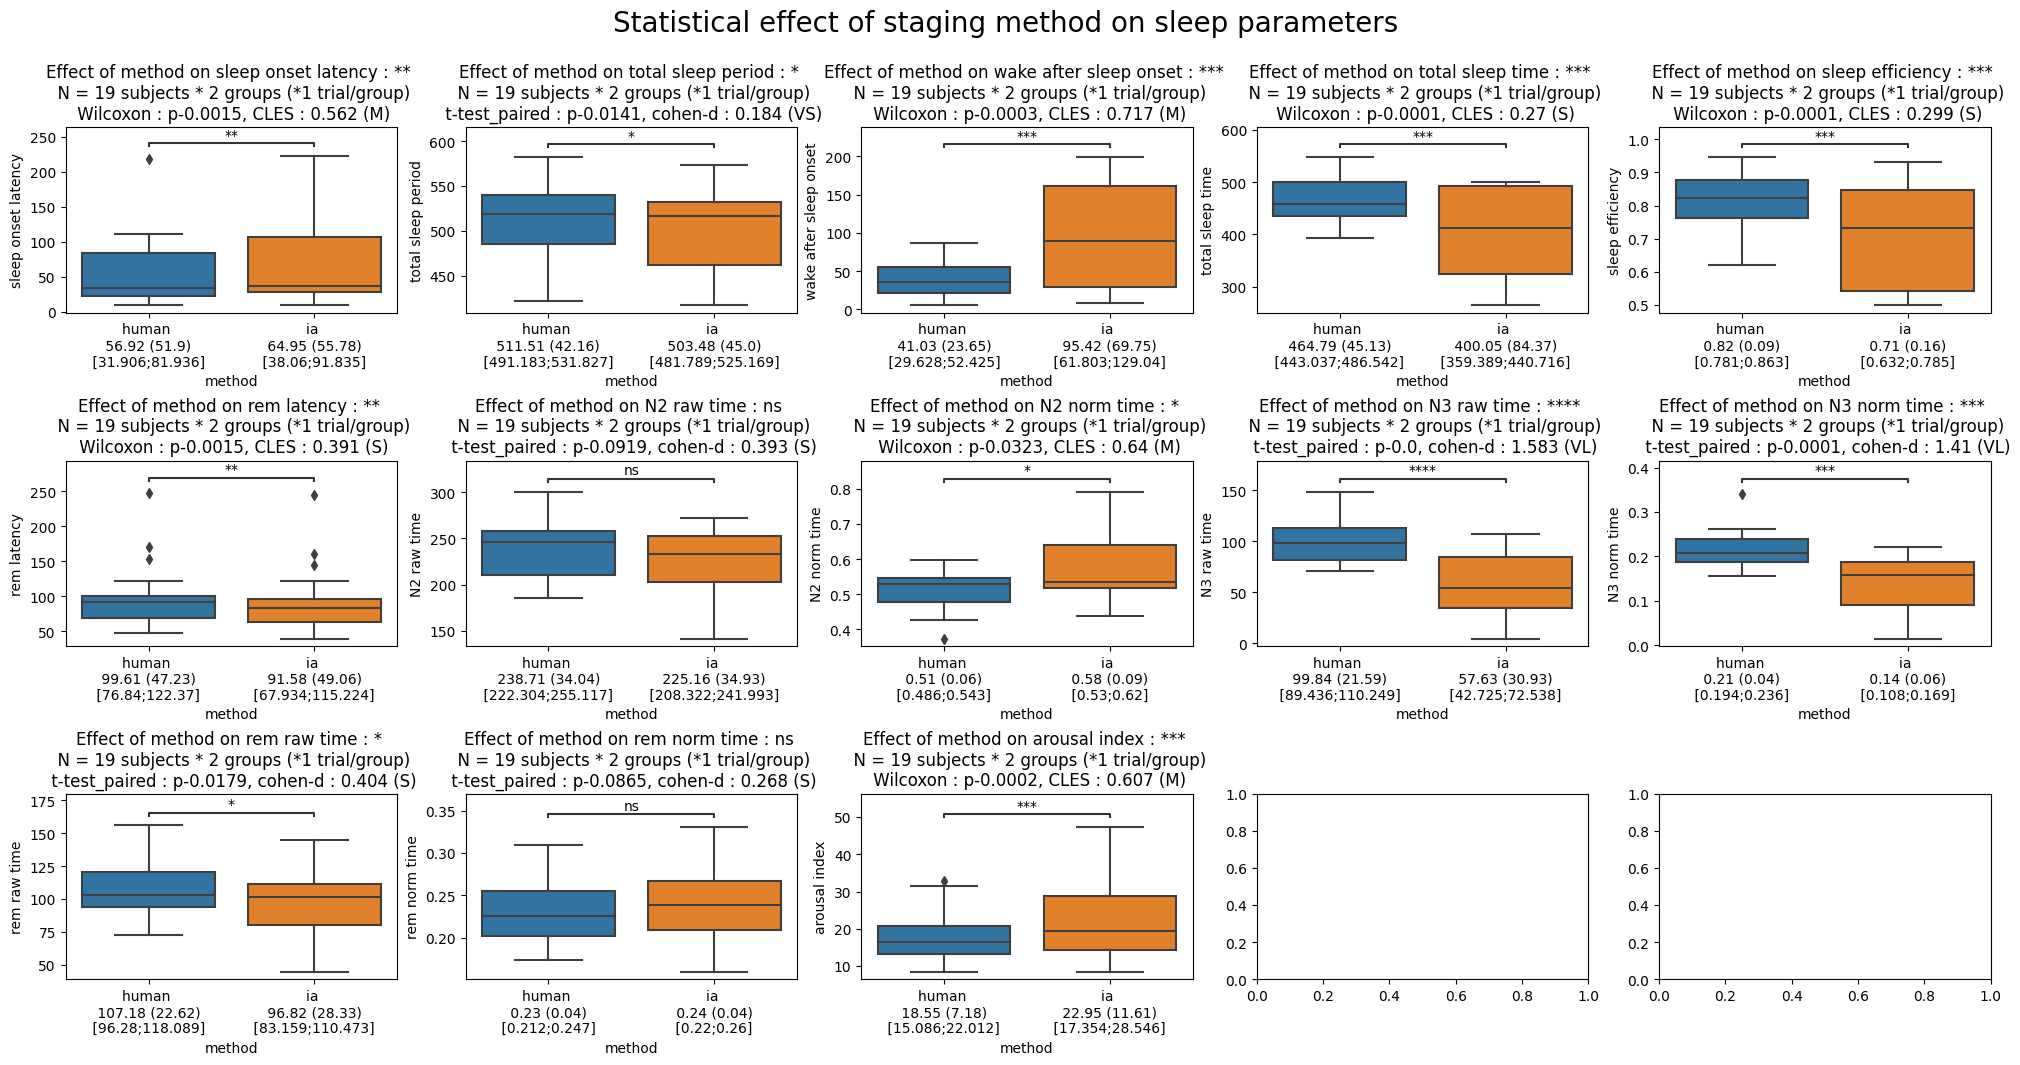

In [7]:
predictor = 'method'
outcomes = sleep_params.set_index(['participant','method','time in bed']).columns
fig, axs = plt.subplots(nrows = 3, ncols = 5, figsize = (20,10), constrained_layout = True)
fig.suptitle('Statistical effect of staging method on sleep parameters', fontsize = 20, y = 1.05)
for row, sublist in enumerate([ outcomes[:5], outcomes[5:10], outcomes[10:] ]):
    for col, outcome in enumerate(sublist):
        ax = axs[row, col]
        gh.auto_stats(df=sleep_params, predictor = predictor, outcome=outcome, design = 'within', transform = False, ax=ax, subject = 'participant')
# plt.savefig('../presentation_5/staging_method_stats', bbox_inches = 'tight')

In [8]:
sleep_params.groupby('method').mean()

/tmp/ipykernel_147300/2201722598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sleep_params.groupby('method').mean()


,time in bed,sleep onset latency,total sleep period,wake after sleep onset,total sleep time,sleep efficiency,rem latency,N2 raw time,N2 norm time,N3 raw time,N3 norm time,rem raw time,rem norm time,arousal index
method,,,,,,,,,,,,,,
human,568.426316,56.921053,511.505263,41.026316,464.789474,0.821766,99.605263,238.710526,0.514297,99.842105,0.214846,107.184211,0.229498,18.549081
ia,568.426316,64.947368,503.478947,95.421053,400.052632,0.708218,91.578947,225.157895,0.575069,57.631579,0.138665,96.815789,0.239901,22.950237


In [9]:
(sleep_params[sleep_params['method'] == 'ia']['N2 raw time'] + sleep_params[sleep_params['method'] == 'ia']['N3 raw time']).describe()

count     19.000000
mean     282.789474
std       50.716345
min      175.500000
25%      247.000000
50%      272.500000
75%      323.500000
max      354.000000
dtype: float64

In [10]:
sleep_params[sleep_params['method'] == 'ia'][['total sleep time','N2 norm time','N3 norm time','rem norm time','N2 raw time','N3 raw time']].describe()

,total sleep time,N2 norm time,N3 norm time,rem norm time,N2 raw time,N3 raw time
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,400.052632,0.575069,0.138665,0.239901,225.157895,57.631579
std,84.367565,0.093192,0.063055,0.041618,34.929712,30.927263
min,264.500000,0.437563,0.014975,0.159213,141.500000,4.500000
25%,324.750000,0.517652,0.090177,0.209138,203.250000,34.750000
50%,412.000000,0.534972,0.157315,0.238238,233.500000,54.500000
75%,492.250000,0.639977,0.187228,0.266503,252.750000,84.750000
max,499.500000,0.792013,0.220421,0.330813,272.500000,107.500000


In [11]:
sleep_params[sleep_params['method'] == 'ia'][['N2 norm time','N3 norm time']].sum(axis = 1).std()

0.06099120829876625

In [16]:
def get_resp_features():
    concat = []
    for participant in participants:
        df = pd.read_excel(f'../df_analyse/resp_features_{participant}.xlsx', index_col = 0)
        ratios = []
        for i, row in df.iterrows():
            ratio = row['insp_duration'] / row['cycle_duration']
            ratios.append(ratio)
        df['ratio'] = ratios
        concat.append(df)
    df_all = pd.concat(concat)
    return df_all

In [17]:
df_resp = get_resp_features()

In [18]:
df_resp

,participant,cycle_num,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,insp_duration,exp_duration,cycle_freq,insp_volume,exp_volume,total_amplitude,insp_amplitude,exp_amplitude,ratio
0,P1,0,155,434,0.605469,1.695312,2.960938,1.089844,1.871094,0.337731,7.869404,-10.496529,23.952921,11.693759,12.259161,0.368074
1,P1,1,913,1202,3.566406,4.695312,3.140625,1.128906,2.011719,0.318408,9.648354,-11.921939,30.184469,15.778508,14.405961,0.359453
2,P1,2,1717,1996,6.707031,7.796875,3.136719,1.089844,2.046875,0.318804,2.488780,-6.864856,11.839557,4.182194,7.657364,0.347447
3,P1,3,2520,2795,9.843750,10.917969,3.140625,1.074219,2.066406,0.318408,6.723655,-9.924664,22.142028,8.989756,13.152271,0.342040
4,P1,4,3324,3557,12.984375,13.894531,2.535156,0.910156,1.625000,0.394453,5.216282,-7.543787,20.618182,10.438046,10.180135,0.359014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,P20,5251,5432757,5433084,21221.707031,21222.984375,3.593750,1.277344,2.316406,0.278261,19.036715,0.194892,30.283431,22.416503,7.866927,0.355435
5252,P20,5252,5433677,5434019,21225.300781,21226.636719,3.730469,1.335938,2.394531,0.268063,18.188272,1.243363,26.473326,19.589920,6.883406,0.358115
5253,P20,5253,5434632,5434978,21229.031250,21230.382812,3.843750,1.351562,2.492188,0.260163,17.340369,1.443977,26.301500,19.142209,7.159291,0.351626
5254,P20,5254,5435616,5435929,21232.875000,21234.097656,3.445312,1.222656,2.222656,0.290249,17.096965,0.833351,26.855650,19.658728,7.196921,0.354875


In [19]:
df_resp[['participant','cycle_duration', 'ratio','insp_duration','exp_duration','cycle_freq']].groupby('participant').mean().describe()

,cycle_duration,ratio,insp_duration,exp_duration,cycle_freq
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,3.838855,0.363833,1.387821,2.451034,0.267819
std,0.479055,0.033987,0.211360,0.333827,0.034746
min,2.887187,0.293433,0.995073,1.774945,0.205320
25%,3.512329,0.335479,1.246284,2.335340,0.249352
50%,3.947479,0.365110,1.398794,2.416101,0.257164
75%,4.070498,0.385354,1.554021,2.641768,0.287630
max,4.923449,0.425580,1.667966,3.283153,0.349600


Text(0.5, 1.0, 'Summary of Mean Respiration Features')

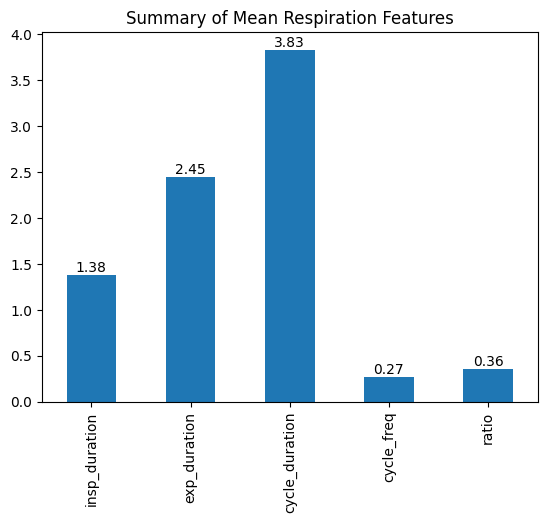

In [22]:
fig, ax = plt.subplots()
df_resp[['insp_duration','exp_duration','cycle_duration','cycle_freq','ratio']].mean().round(2).plot.bar(ax=ax)
ax.bar_label(ax.containers[0])
ax.set_title('Summary of Mean Respiration Features')
# plt.savefig('../presentation_4/mean_rsp_features', bbox_inches = 'tight')

Text(0.5, 1.0, 'Number of respiration cycles studied by participant')

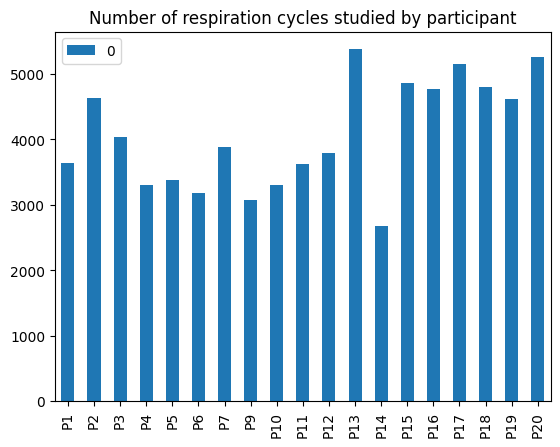

In [23]:
fig, ax = plt.subplots()
pd.DataFrame.from_dict({participant:df_resp[df_resp['participant'] == participant].shape[0] for participant in participants}, orient = 'index').plot.bar(ax=ax)
ax.set_title('Number of respiration cycles studied by participant')
# plt.savefig('../presentation_5/nb_cycles_by_participant', bbox_inches = 'tight')

In [25]:
df_resp.mean()[['insp_duration','exp_duration','cycle_duration','cycle_freq','ratio']]

/tmp/ipykernel_147300/1818065069.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_resp.mean()[['insp_duration','exp_duration','cycle_duration','cycle_freq','ratio']]


insp_duration     1.377634
exp_duration      2.448123
cycle_duration    3.825757
cycle_freq        0.268489
ratio             0.362438
dtype: float64

In [57]:
df_mean_rsp_features_all = df_resp.groupby('participant').mean().reset_index()
df_mean_rsp_features_all

,participant,cycle_num,inspi_index,expi_index,inspi_time,expi_time,cycle_duration,insp_duration,exp_duration,cycle_freq,insp_volume,exp_volume,total_amplitude,insp_amplitude,exp_amplitude,ratio
0,P1,1822.505491,1.335588e+06,1.335856e+06,5217.142358,5218.185644,2.887187,1.043286,1.843901,0.349600,6.467934,-9.141302,23.259971,9.928025,13.331946,0.363089
1,P10,1652.722424,1.769532e+06,1.769837e+06,6912.234931,6913.425412,3.296303,1.190481,2.105823,0.307212,69.740357,35.657396,104.993869,73.126338,31.867531,0.365110
2,P11,1828.425767,1.614466e+06,1.614721e+06,6306.509540,6307.504614,3.409964,0.995073,2.414891,0.296257,2.279946,-10.336774,10.798441,4.331346,6.467095,0.293433
3,P12,1894.958520,1.842146e+06,1.842523e+06,7195.883879,7197.353860,3.884702,1.469981,2.414721,0.261459,10.733826,-2.811277,14.513609,9.644822,4.868787,0.381404
4,P13,2690.882692,2.334553e+06,2.334839e+06,9119.347271,9120.462916,3.487380,1.115645,2.371735,0.290382,15.092573,-25.319810,51.448863,22.297250,29.151612,0.322279
5,P14,6995.486769,1.893986e+06,1.894397e+06,7398.382664,7399.988714,3.878761,1.606050,2.272711,0.260686,4.744390,-0.936073,5.684229,4.367288,1.316941,0.415478
6,P15,2428.309372,2.681687e+06,2.682108e+06,10475.338967,10476.983654,4.362338,1.644687,2.717651,0.232306,13.279936,-9.589765,22.503487,12.214418,10.289069,0.380606
7,P16,2385.500000,2.453786e+06,2.454190e+06,9585.101924,9586.678590,4.072951,1.576665,2.496285,0.247950,9.876294,-7.341197,19.380409,10.054891,9.325518,0.389150
8,P17,2573.183090,2.335104e+06,2.335399e+06,9121.501192,9122.651142,3.537278,1.149950,2.387328,0.284878,5.859126,-18.634524,25.346541,8.781098,16.565443,0.326740
9,P18,79865.637820,3.155009e+06,3.155342e+06,12324.254217,12325.556305,3.077033,1.302088,1.774945,0.328938,8.320524,-8.367384,20.444820,10.044100,10.400721,0.425580


In [58]:
df_mean_rsp_features_all[['cycle_duration','ratio','insp_duration','exp_duration','cycle_freq']].mean().round(2)

cycle_duration    3.84
ratio             0.36
insp_duration     1.39
exp_duration      2.45
cycle_freq        0.27
dtype: float64

In [60]:
# df_mean_rsp_features_all.to_excel('../participant_characteristics/mean_resp_features_by_participant.xlsx')

In [26]:
def get_spindles_features(patients):
    concat = [pd.read_excel(f'../df_analyse/spindles_{patient}.xlsx', index_col = 0) for patient in patients]
    df = pd.concat(concat)
    return df

In [29]:
df_spindles = get_spindles_features(patients)

In [30]:
df_spindles

,patient,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,P1,59.058594,59.421875,59.949219,0.890625,50.531704,9.218439,1.675440,0.273461,13.133481,9,0.406114,Fp2-C4,0
1,P1,61.675781,62.152344,62.367188,0.691406,45.320142,11.024842,2.245295,0.551913,12.831497,9,0.685393,Fp2-C4,0
2,P1,65.429688,65.742188,66.015625,0.585938,44.190640,10.303671,2.206339,0.374822,13.945174,8,0.529801,Fp2-C4,0
3,P1,67.644531,67.765625,68.296875,0.652344,48.667588,11.655442,2.139003,0.361876,14.613991,8,0.184524,Fp2-C4,0
4,P1,87.617188,87.996094,88.328125,0.710938,50.774271,10.271449,1.864013,0.237496,13.915612,7,0.530055,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,P20,18430.914062,18431.230469,18431.636719,0.722656,25.623610,6.583862,1.642878,0.344818,13.013071,10,0.435484,T3-O1,7
5145,P20,19175.683594,19176.171875,19176.394531,0.710938,43.625760,7.561749,1.426728,0.300247,13.339458,8,0.683060,T3-O1,7
5146,P20,19716.933594,19717.316406,19717.660156,0.726562,30.679380,7.683526,1.589723,0.257657,13.378984,10,0.524064,T3-O1,7
5147,P20,20444.019531,20444.464844,20444.648438,0.628906,41.614735,8.154199,1.522595,0.244845,13.357375,7,0.703704,T3-O1,7


In [31]:
df_spindles['patient'].value_counts().describe()

count      19.000000
mean     3494.631579
std      1590.882537
min       997.000000
25%      2424.000000
50%      3577.000000
75%      4750.500000
max      6231.000000
Name: patient, dtype: float64

In [32]:
df_spindles['Channel'].value_counts()

C3-T3     11405
C4-T4     11231
Fp1-C3    10599
Fp2-C4    10379
Fz-Cz     10321
Cz-Pz      4878
T3-O1      4025
T4-O2      3560
Name: Channel, dtype: int64

In [33]:
df_spindles[['patient','Duration','Frequency','Oscillations']].groupby('patient').mean().describe()

,Duration,Frequency,Oscillations
count,19.000000,19.000000,19.000000
mean,0.827052,13.538951,10.484138
std,0.056907,0.326754,0.775420
min,0.731950,13.154156,9.132397
25%,0.788913,13.244235,9.946857
50%,0.833423,13.515314,10.570030
75%,0.851052,13.773620,10.838920
max,0.943677,14.292670,11.977050


In [34]:
df_spindles[['patient','Duration','Frequency','Oscillations']].groupby('patient').std().mean()

Duration        0.240231
Frequency       0.535555
Oscillations    3.105200
dtype: float64

In [35]:
df_spindles['Channel'].unique()

array(['Fp2-C4', 'C4-T4', 'T4-O2', 'Fz-Cz', 'Cz-Pz', 'Fp1-C3', 'C3-T3',
       'T3-O1'], dtype=object)

In [36]:
order_chans = ['Fp1-C3','Fp2-C4', 'Fz-Cz', 'C3-T3', 'C4-T4' ,'Cz-Pz' ,'T4-O2'  ,'T3-O1']

In [37]:
rows = []
for participant in participants:
    for chan in order_chans:
        df_participant_spindles = df_spindles[(df_spindles['patient'] == participant) & (df_spindles['Channel'] == chan)]
        nspindles = df_participant_spindles.shape[0] 
        total_duration_in_minutes = df_resp[df_resp['participant'] == participant]['cycle_duration'].sum() / 60
        nspindles_by_minute = nspindles / total_duration_in_minutes
        rows.append([participant, chan, nspindles, total_duration_in_minutes , nspindles_by_minute])
df_spindles_features_number = pd.DataFrame(rows, columns = ['participant','dérivation', 'nspindles','total duration','nspindles_by_minutes'])

In [38]:
df_spindles_features_number

,participant,dérivation,nspindles,total duration,nspindles_by_minutes
0,P1,Fp1-C3,518,175.252279,2.955739
1,P1,Fp2-C4,483,175.252279,2.756027
2,P1,Fz-Cz,500,175.252279,2.853030
3,P1,C3-T3,384,175.252279,2.191127
4,P1,C4-T4,413,175.252279,2.356603
...,...,...,...,...,...
147,P20,C3-T3,856,353.702799,2.420111
148,P20,C4-T4,925,353.702799,2.615190
149,P20,Cz-Pz,483,353.702799,1.365553
150,P20,T4-O2,65,353.702799,0.183770


In [39]:
df_spindles_features_number.groupby('dérivation').mean().describe()

/tmp/ipykernel_147300/1642472014.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_spindles_features_number.groupby('dérivation').mean().describe()


,nspindles,total duration,nspindles_by_minutes
count,8.000000,8.00000,8.000000
mean,436.828947,259.56421,1.703604
std,182.730009,0.00000,0.737007
min,187.368421,259.56421,0.705922
25%,245.513158,259.56421,0.918652
50%,544.736842,259.56421,2.141198
75%,566.157895,259.56421,2.233146
max,600.263158,259.56421,2.369866


In [40]:
df_spindles_features_number.describe()

,nspindles,total duration,nspindles_by_minutes
count,152.000000,152.000000,152.000000
mean,436.828947,259.564210,1.703604
std,282.455031,56.581783,1.130311
min,2.000000,173.445247,0.007921
25%,201.500000,215.335221,0.842263
50%,397.000000,246.521615,1.407790
75%,661.000000,312.643620,2.563015
max,1018.000000,353.702799,4.633289


Text(0.5, 1.0, 'N Spindles detected by minute of NREM')

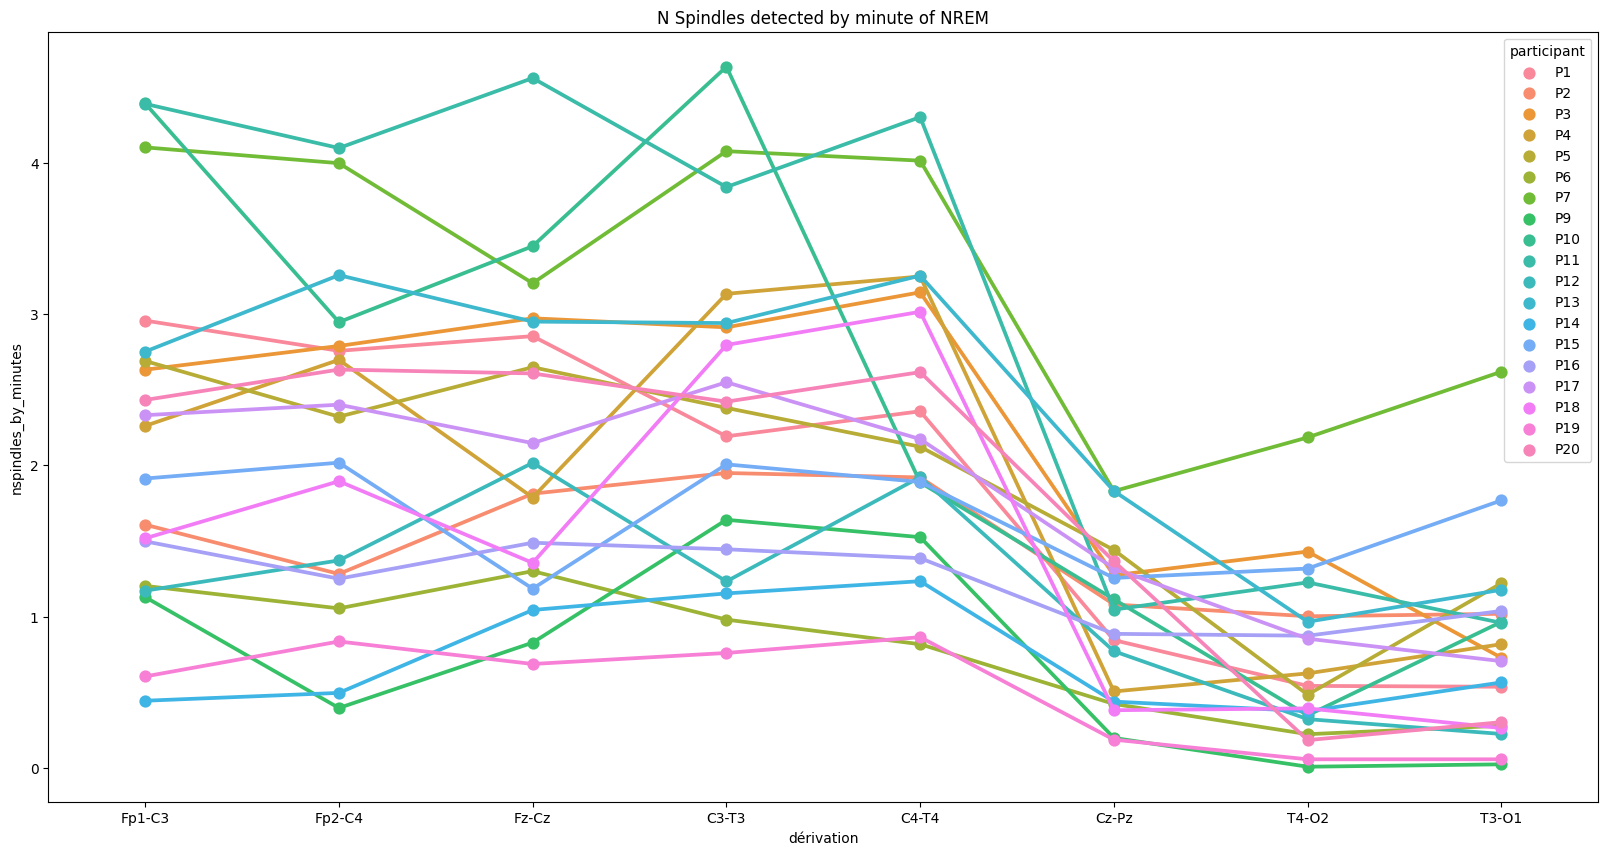

In [41]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_spindles_features_number, x='dérivation', y = 'nspindles_by_minutes',hue = 'participant', ax=ax)
ax.set_title('N Spindles detected by minute of NREM')
# plt.savefig('../presentation_4/n_spindles_by_minute')

Text(0.5, 1.0, 'N Spindles detected by minute of NREM')

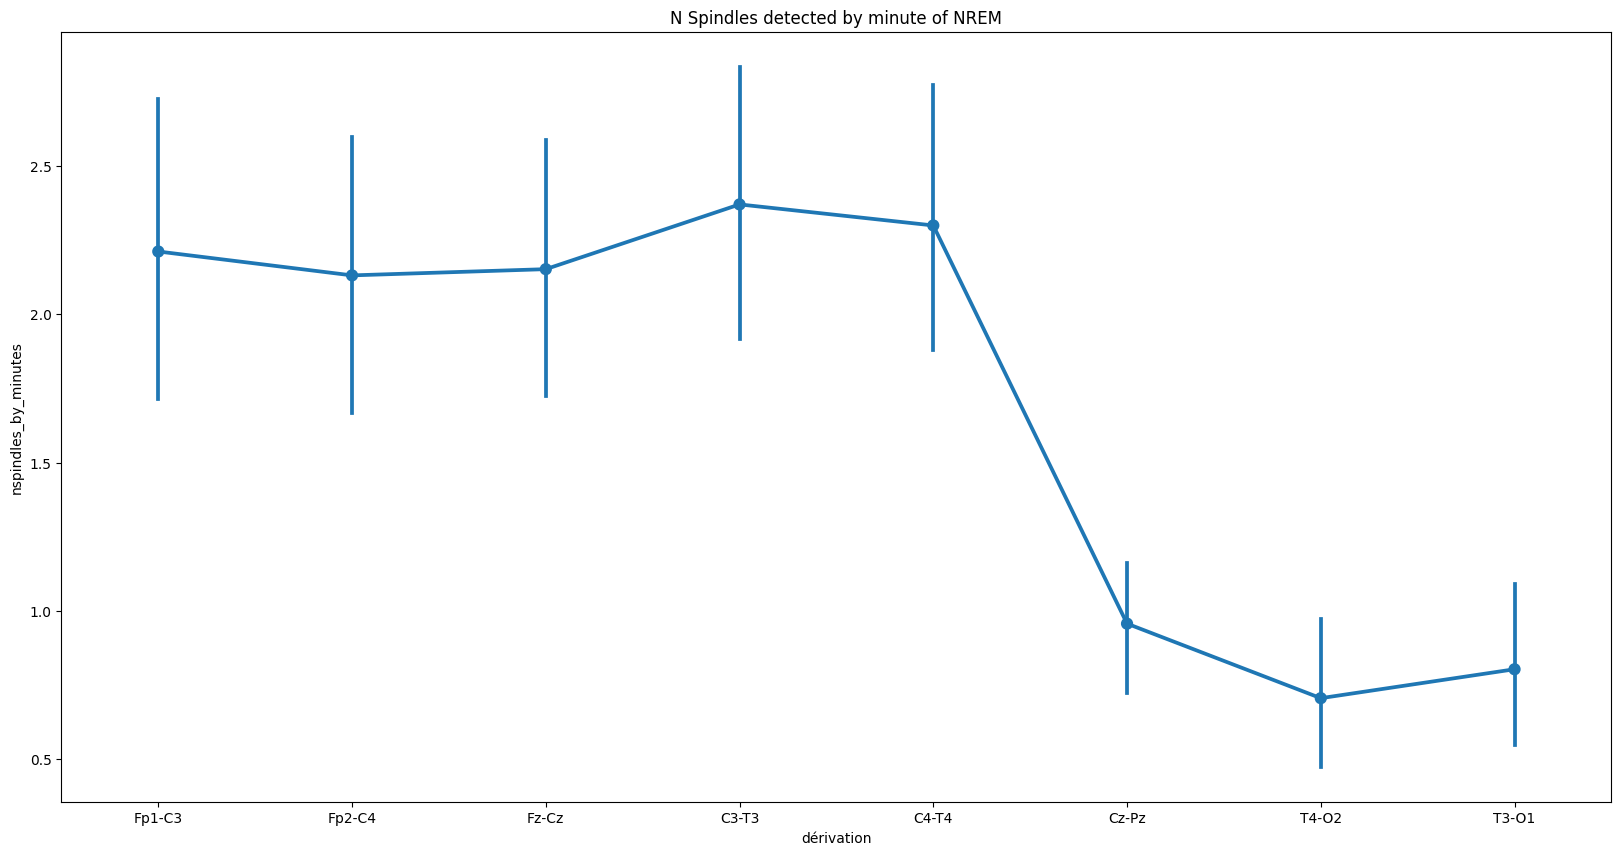

In [42]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=df_spindles_features_number, x='dérivation', y = 'nspindles_by_minutes', ax=ax)
ax.set_title('N Spindles detected by minute of NREM')
# plt.savefig('../presentation_4/n_spindles_by_minute')

[Text(0, 0, '0.84'), Text(0, 0, '13.54'), Text(0, 0, '10.71')]

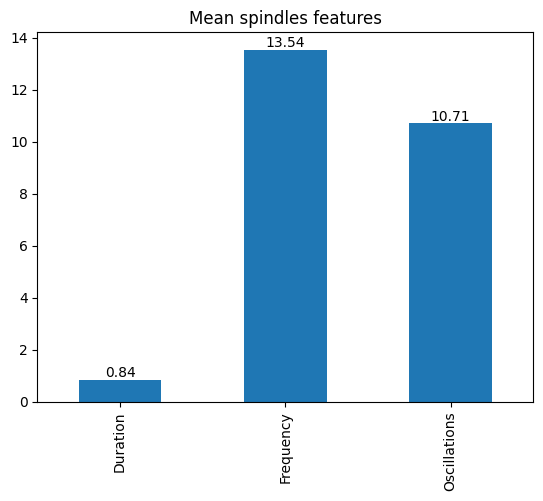

In [43]:
fig, ax = plt.subplots()
df_spindles[['Duration','Frequency','Oscillations']].mean().round(2).plot.bar(ax=ax)
ax.set_title('Mean spindles features')
ax.bar_label(ax.containers[0])
# plt.savefig('../presentation_4/mean_spindles_features', bbox_inches = 'tight')

In [44]:
df_spindles.mean()[['Duration','Frequency']]

/tmp/ipykernel_147300/3536899752.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_spindles.mean()[['Duration','Frequency']]


Duration      0.843601
Frequency    13.538526
dtype: float64

/tmp/ipykernel_147300/3458334005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_spindles.corr('spearman'))


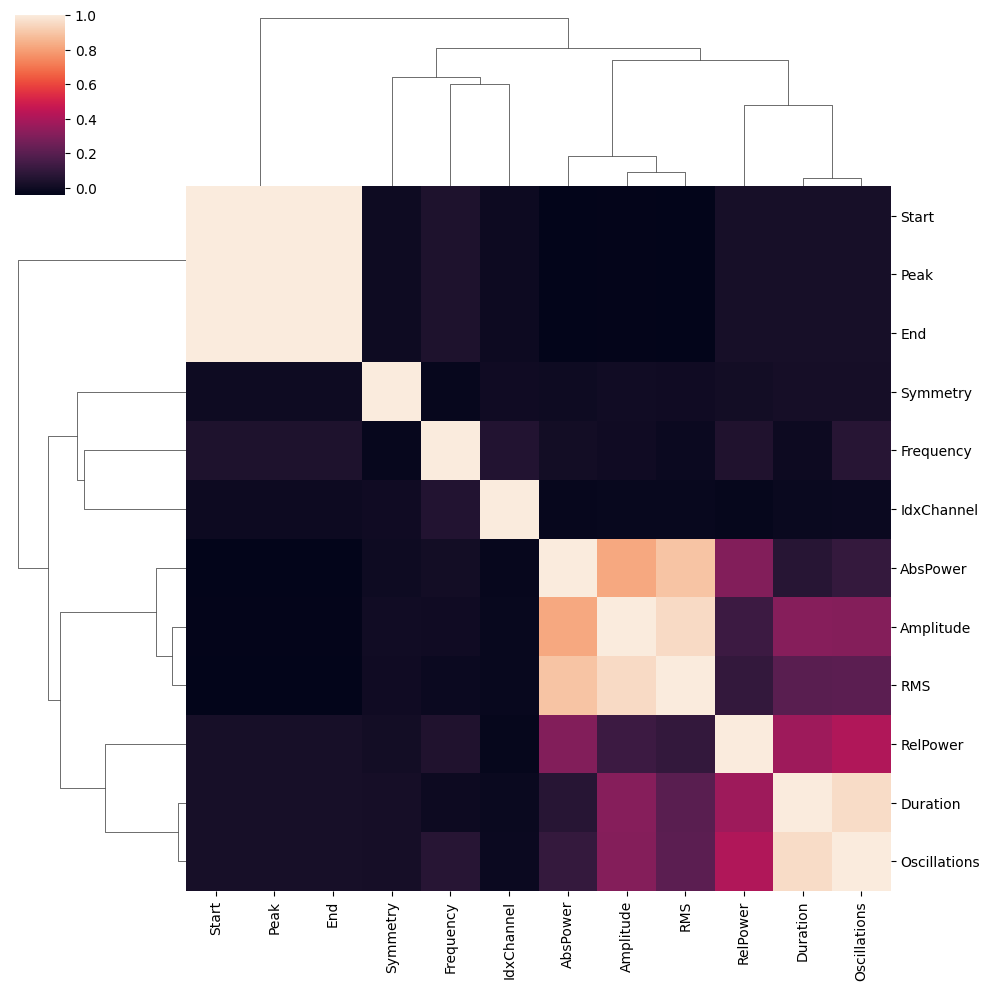

In [45]:
sns.clustermap(df_spindles.corr('spearman'))

In [46]:
def get_staging_comparison_features():
    concat = []
    for participant in participants:
        ser = pd.read_excel(f'../df_analyse/win_staging_{participant}.xlsx').T.loc['win',:].values
        concat.append(ser)
    df_all = pd.DataFrame(concat, columns = [0,1])
    return df_all

In [47]:
get_staging_comparison_features().mean()

FileNotFoundError: [Errno 2] No such file or directory: '../df_analyse/win_staging_P11.xlsx'

In [48]:
def get_spindle_cycle_features():
    concat = []
    for participant in participants:
        ser = pd.read_excel(f'../df_analyse/cycles_numbers_{participant}.xlsx').iloc[:,1].values
        concat.append(ser)
    df_all = pd.DataFrame(concat, columns = ['participant','all','spindled', 'unspindled'])
    return df_all

In [49]:
get_spindle_cycle_features()

FileNotFoundError: [Errno 2] No such file or directory: '../df_analyse/cycles_numbers_P11.xlsx'

In [50]:
def get_sw_features(participants=participants):
    concat = []
    for participant in participants:
        df = pd.read_excel(f'../df_analyse/sw_{participant}.xlsx', index_col = 0)
        df.insert(0, 'participant', participant)
        concat.append(df)
    df_all = pd.concat(concat)
    return df_all


In [51]:
sw = get_sw_features()

In [52]:
sw

,participant,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,SigmaPeak,PhaseAtSigmaPeak,ndPAC,Channel,IdxChannel
0,P1,217.242188,217.742188,218.039062,218.250000,218.574219,1.3320,-49.212601,26.474553,75.687154,254.946204,0.750751,217.457031,2.100138,0.390700,Fp2-C4,0
1,P1,441.878906,442.425781,442.761719,442.917969,443.093750,1.2148,-70.178987,17.865331,88.044319,262.085414,0.823181,441.914062,1.653936,0.300125,Fp2-C4,0
2,P1,447.082031,447.363281,447.621094,447.804688,447.976562,0.8945,-46.691497,30.282528,76.974025,298.565914,1.117943,447.144531,1.850405,0.304613,Fp2-C4,0
3,P1,447.976562,448.226562,448.460938,448.691406,448.968750,0.9922,-57.412672,48.587253,105.999925,452.266345,1.007861,447.226562,2.234253,0.000000,Fp2-C4,0
4,P1,528.066406,528.316406,528.562500,528.777344,528.988281,0.9219,-47.758588,40.480118,88.238707,358.557284,1.084716,528.046875,1.459173,0.288163,Fp2-C4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11109,P20,19901.210938,19901.968750,19902.214844,19902.425781,19902.667969,1.4570,-74.820637,61.725153,136.545790,554.852734,0.686342,19902.812500,-2.110488,0.244305,T3-O1,7
11110,P20,19972.308594,19972.621094,19972.921875,19973.289062,19973.625000,1.3164,-53.101568,58.108061,111.209629,369.735909,0.759648,19973.496094,0.791703,0.481096,T3-O1,7
11111,P20,19995.671875,19995.941406,19996.152344,19996.406250,19996.679688,1.0078,-44.338673,60.343697,104.682370,496.271977,0.992260,19995.761719,2.207869,0.302955,T3-O1,7
11112,P20,20112.718750,20113.003906,20113.304688,20113.511719,20114.179688,1.4609,-69.898094,26.552757,96.450851,320.667765,0.684510,20113.300781,-1.610195,0.109800,T3-O1,7


In [54]:
sw['participant'].value_counts().describe()

count       19.000000
mean      4979.947368
std       3080.907415
min        564.000000
25%       2505.500000
50%       4742.000000
75%       7325.500000
max      11114.000000
Name: participant, dtype: float64

In [55]:
sw[['participant','Duration','Frequency','PTP']].describe()

,Duration,Frequency,PTP
count,94619.000000,94619.000000,94619.000000
mean,1.208466,0.866488,112.121949
std,0.260301,0.186028,27.738928
min,0.660200,0.433163,75.002043
25%,0.996100,0.713114,90.150734
50%,1.179700,0.847673,106.027434
75%,1.402300,1.003915,128.464062
max,2.308600,1.514693,232.443363


In [61]:
mapper_month = {'jan':1,'fev':2,'feb':2,'mar':3,'avr':4,'apr':4,'mai':5,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
rows = []
for participant in patients:
    print(participant)
    input_file = glob.glob(f'../data/{participant}/*.edf')[0]
    signals, signal_headers, header = highlevel.read_edf(input_file)
    gender = header['gender']
    date = header['startdate']
    birth = header['birthdate']
    dbirth = int(birth.split(' ')[0])
    mbirth = mapper_month[birth.split(' ')[1]]
    ybirth = int(birth.split(' ')[2])
    datebirth = datetime.datetime(ybirth, mbirth, dbirth)
    age = (date - datebirth).days // 365
    rows.append([participant, gender , age])
    
df_age = pd.DataFrame(rows, columns = ['participant', 'gender', 'age'])
df_age.to_excel('../participant_characteristics/gender_age.xlsx')
    

P1
P2
P3
P4
P5
P6
P7
P9
P10
P11
P12
P13
P14
P15
P16
P17
P18
P19
P20


In [62]:
df_age.describe()

,age
count,19.000000
mean,27.315789
std,8.628458
min,16.000000
25%,19.500000
50%,25.000000
75%,32.500000
max,47.000000
